In [105]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [106]:
df = pd.read_csv('Final_dataset.csv')

In [107]:
df.dropna(inplace=True)

In [108]:
if 'Customer ID' in df.columns:
    df.rename(columns={'Customer ID':'Customer_ID'},inplace=True) 

In [109]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount,recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,1062 days 09:34:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,1062 days 09:34:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,1062 days 09:34:00


In [110]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount,recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,1062 days 09:34:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,1062 days 09:34:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,1062 days 09:34:00


In [111]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [112]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer_ID    float64
Country         object
Amount         float64
recency         object
dtype: object

In [113]:
sales = df.groupby('InvoiceDate')['Amount'].sum()

In [114]:
daily_sales_data = pd.DataFrame(sales)

In [115]:
daily_sales_data.reset_index()

,InvoiceDate,Amount
0,2009-01-12,42708.22
1,2009-02-12,52578.19
2,2009-03-12,61534.22
3,2009-04-12,33686.86
4,2009-05-12,9803.05
...,...,...
599,2011-12-06,12439.01
600,2011-12-07,17577.68
601,2011-12-08,17912.42
602,2011-12-09,27290.38


In [116]:
daily_sales_data.index = pd.to_datetime(daily_sales_data.index)

In [117]:
daily_sales_data.head()

,Amount
InvoiceDate,
2009-01-12,42708.22
2009-02-12,52578.19
2009-03-12,61534.22
2009-04-12,33686.86
2009-05-12,9803.05


<AxesSubplot: xlabel='InvoiceDate'>

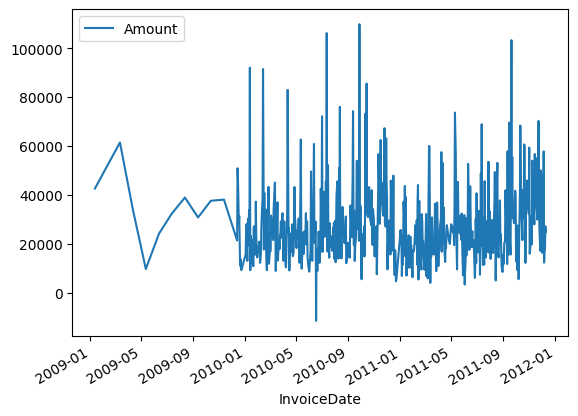

In [118]:
daily_sales_data.plot()

In [119]:
interdf=daily_sales_data.interpolate(method='time')
# df.interpolate(method='time',inplace=True)

<AxesSubplot: xlabel='InvoiceDate'>

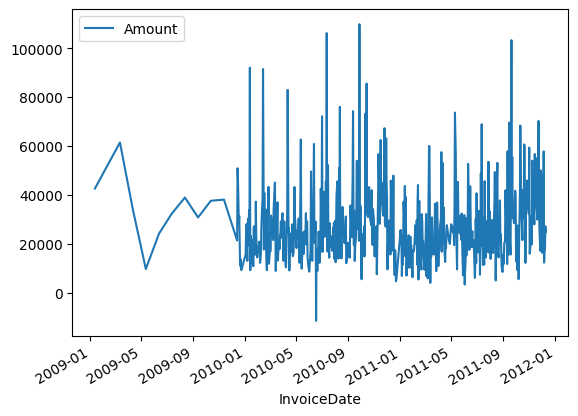

In [120]:
interdf.plot()

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
# from sklearn.model_selection import train_test_split

In [123]:
daily_sales_data=daily_sales_data.reset_index()

In [124]:
daily_sales_data.columns

Index(['InvoiceDate', 'Amount'], dtype='object')

In [125]:
# df['date'].astype('int64').values.reshape(-1, 1)
# X_train, X_test, y_train, y_test = daily_sales_data['InvoiceDate'].astype('int64').values.reshape(-1, 1)[:300],daily_sales_data['Amount']

In [126]:
X_train = daily_sales_data['InvoiceDate'].astype('int64').values.reshape(-1, 1)[:300]
y_train = daily_sales_data['Amount'][:300]
X_test = daily_sales_data['InvoiceDate'].astype('int64').values.reshape(-1, 1)[300:]
y_test = daily_sales_data['Amount'][300:]

In [127]:
regression_model = LinearRegression()

In [128]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [129]:
regression_model.score(X_test,y_test)

-0.12363610758184684

In [130]:
daily_sales_data

,InvoiceDate,Amount
0,2009-01-12,42708.22
1,2009-02-12,52578.19
2,2009-03-12,61534.22
3,2009-04-12,33686.86
4,2009-05-12,9803.05
...,...,...
599,2011-12-06,12439.01
600,2011-12-07,17577.68
601,2011-12-08,17912.42
602,2011-12-09,27290.38


In [131]:
daily_sales_data.columns

Index(['InvoiceDate', 'Amount'], dtype='object')

In [132]:
# for i in range
# daily_sales_data.index = pd.to_datetime(daily_sales_data['InvoiceDate'])
daily_sales_data.set_index('InvoiceDate',inplace=True)
# daily_sales_data.head(100).plot()

In [133]:
# daily_sales_data.drop(columns=['InvoiceDate'],inplace=True)

In [134]:
group = daily_sales_data.groupby(daily_sales_data.index.year)

In [135]:
group

InvoiceDate
2009    AxesSubplot(0.125,0.2;0.775x0.68)
2010    AxesSubplot(0.125,0.2;0.775x0.68)
2011    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

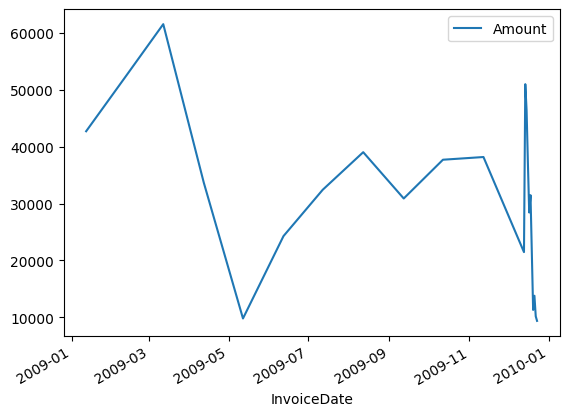

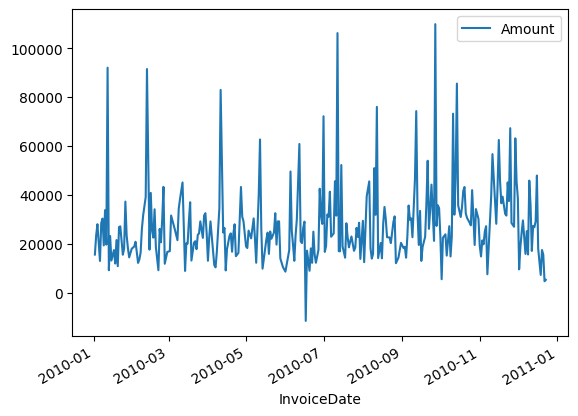

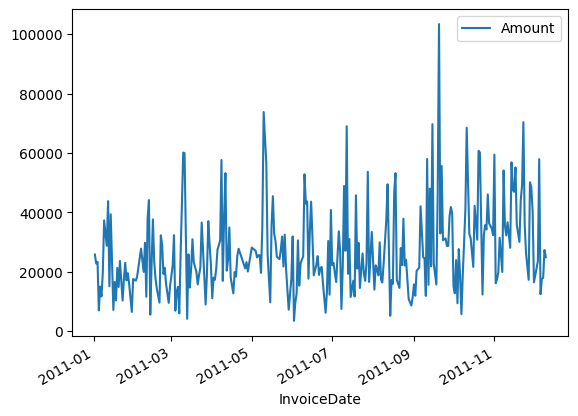

In [136]:
group.plot()

In [137]:
daily_sales_data.to_csv('daily_sales_data')

In [138]:
import seaborn as sns

In [139]:
predicted = pd.DataFrame()

In [140]:
predicted.index = np.arange(0,len(X_test))
predicted['Dates'] = daily_sales_data.index[300:]
predicted['Actual'] = np.array(y_test)
predicted['predict'] = np.array(regression_model.predict(X_test))

In [141]:
X_test

array([[1291334400000000000],
       [1291420800000000000],
       [1291507200000000000],
       [1291680000000000000],
       [1291766400000000000],
       [1291852800000000000],
       [1291939200000000000],
       [1292025600000000000],
       [1292112000000000000],
       [1292198400000000000],
       [1292284800000000000],
       [1292371200000000000],
       [1292457600000000000],
       [1292544000000000000],
       [1292716800000000000],
       [1292803200000000000],
       [1292889600000000000],
       [1292976000000000000],
       [1293062400000000000],
       [1293926400000000000],
       [1294012800000000000],
       [1294099200000000000],
       [1294185600000000000],
       [1294272000000000000],
       [1294358400000000000],
       [1294444800000000000],
       [1294531200000000000],
       [1294704000000000000],
       [1294790400000000000],
       [1294876800000000000],
       [1294963200000000000],
       [1295136000000000000],
       [1295222400000000000],
       [12

In [142]:
predicted.head()

,Dates,Actual,predict
0,2010-12-03,18920.830,30529.073983
1,2010-12-04,24787.951,30541.359393
2,2010-12-05,29671.910,30553.644803
3,2010-12-07,15974.800,30578.215623
4,2010-12-08,25287.190,30590.501033


In [143]:
predicted.set_index('Dates',inplace=True)

<AxesSubplot: xlabel='Dates', ylabel='Actual'>

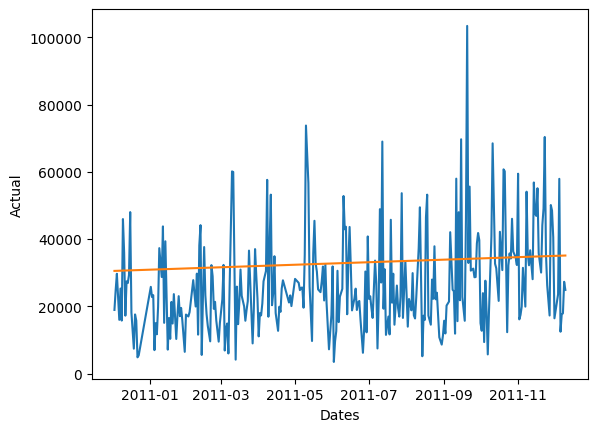

In [144]:
sns.lineplot(predicted['Actual'])
sns.lineplot(predicted['predict'])



In [145]:
#import mse
from sklearn.metrics import mean_squared_error

In [146]:
mean_squared_error(y_test,regression_model.predict(X_test))

239012018.61605182